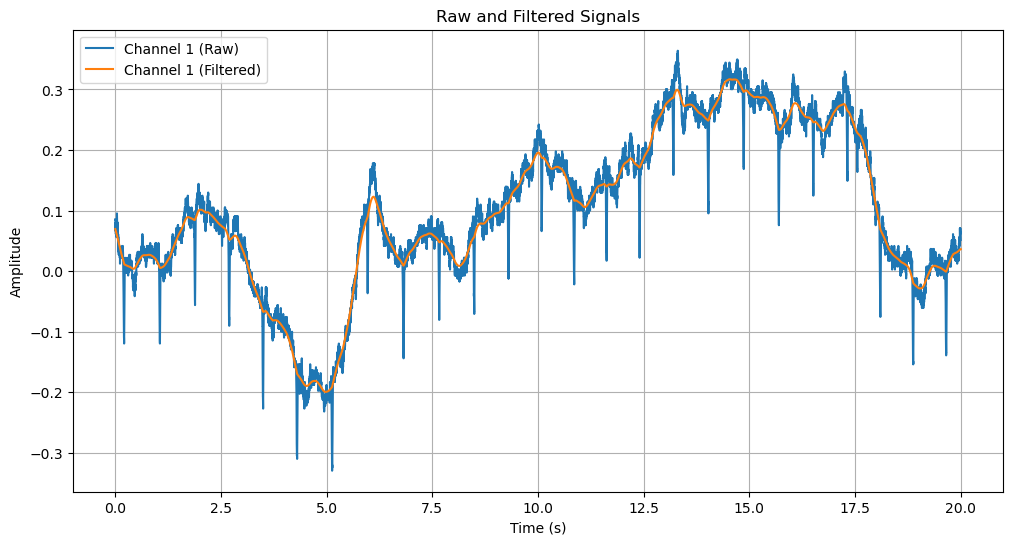

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from oset.generic.lp_filter.lp_filter_zero_phase import lp_filter_zero_phase

# Load the MATLAB .mat file

# Example 1:
data = sio.loadmat("../../../datasets/sample-data/SampleECG1.mat")
x = data["data"]

# Example 2:
# data = sio.loadmat('../../datasets/sample-data/SampleECG1kHz2.mat')
# x = data['data'].T[1:]  # Transpose x (assuming it is stored as 'ECGData' in the .mat file)

# Define the cutoff frequency
fs = 1000
f = 1.0
fc = f / fs

# Apply the filter to the signal
filtered_data = lp_filter_zero_phase(x, fc)

# Plot the raw and filtered signals
time = np.arange(x.shape[1]) / fs

plt.figure(figsize=(12, 6))
for i in range(x.shape[0]):
    plt.plot(time, x[i, :], label=f"Channel {i + 1} (Raw)")
    plt.plot(time, filtered_data[i, :], label=f"Channel {i + 1} (Filtered)")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Raw and Filtered Signals")
plt.legend()
plt.grid(True)
plt.show()

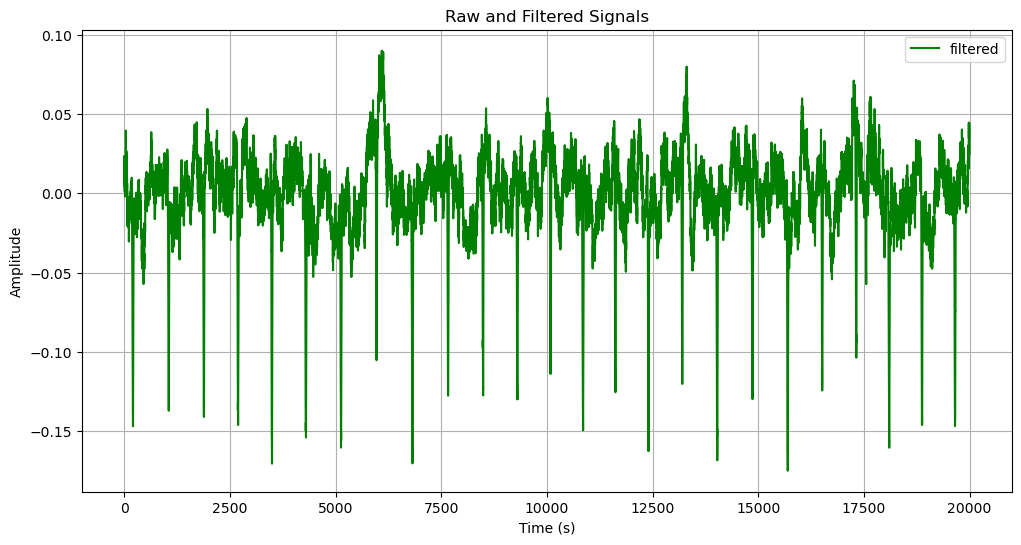

In [13]:
import scipy

f = 1
fc = 0.5
fs = 1000
mat = scipy.io.loadmat("../../../datasets/sample-data/SampleECG1.mat")["data"][0]
mat = mat - lp_filter_zero_phase(mat, fc / fs)
plt.figure(figsize=(12, 6))
plt.plot(mat, "g", label="filtered")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Raw and Filtered Signals")
plt.legend()
plt.grid(True)
plt.show()